In [58]:
%pylab inline
from scipy.integrate import quad

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Problem 1

In [59]:
class Universe:
    
    def __init__(self,omega_rad,omega_mass,omega_lam):

        self.H0 =  2.2683e-18 #seconds
        self.omega_rad = omega_rad
        self.omega_mass = omega_mass
        self.omega_lam = omega_lam
        self.omega_0 = (self.omega_rad+self.omega_mass+self.omega_lam)
        pass
    
    def friedmann_eq(self, x):
        t = np.sqrt(1/(self.H0**2.0*(self.omega_rad*(x**-2.0)+self.omega_mass*(x**-1.0) +
                             self.omega_lam*(x**2.0)+(1.0-self.omega_0+0.j))))
        if imag(t)==0.j:
            return abs(t)
        else:
            pass 

        

[             nan   1.23183883e-02   3.51447349e-02   6.51390775e-02
   1.01199804e-01   1.42745616e-01   1.89427750e-01   2.41027450e-01
   2.97408916e-01   3.58494428e-01   4.24249955e-01   4.94676355e-01
   5.69803787e-01   6.49688147e-01   7.34408819e-01   8.24067367e-01
   9.18786906e-01   1.01871202e+00   1.12400910e+00   1.23486712e+00
   1.35149876e+00   1.47414181e+00   1.60306106e+00   1.73855045e+00
   1.88093566e+00   2.03057709e+00   2.18787338e+00   2.35326534e+00
   2.52724053e+00   2.71033837e+00   2.90315596e+00   3.10635461e+00
   3.32066700e+00   3.54690506e+00   3.78596839e+00   4.03885305e+00
   4.30666005e+00   4.59060311e+00   4.89201407e+00   5.21234411e+00
   5.55315754e+00   5.91611343e+00   6.30292813e+00   6.71530939e+00
   7.15484977e+00   7.62286606e+00   8.12017325e+00   8.64679211e+00
   9.20161201e+00   9.78206786e+00   1.03839329e+01   1.10013504e+01
   1.16271925e+01   1.22537251e+01   1.28734269e+01   1.34797326e+01
   1.40675153e+01   1.46332448e+01

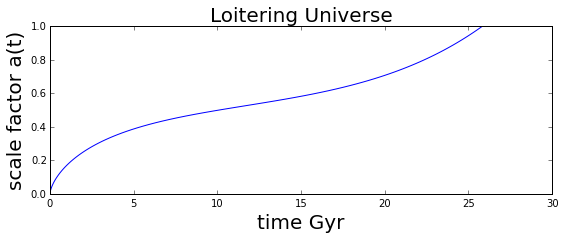

In [114]:
univ_loiter = Universe(0.0,0.60,2.060)
def integrand(x):
        try:
            return quad(univ_loiter.friedmann_eq,0.0,x,)
        except:
            return np.nan,np.nan
    
step = 0.01
values = [] 
a = np.linspace(0.0,1.0,100)
for i in a:
    #print(a)
    integral0,err = integrand(i)
    #print(integral0)
    values.append(integral0)
values = np.asarray(values)
values = values/(1e9*365*24*3600) # converting to Gyr
print(values)

figure(figsize=(9,3))
plt.plot(values,a)
xlabel('time Gyr',fontsize = 20)
ylabel('scale factor a(t)', fontsize= 20)
title("Loitering Universe", fontsize = 20)

In [61]:
import numpy.ma as ma

In [110]:
univ_crunch = Universe(0.0,6.0,0.0)


def integrand(x):
        try:
            return quad(univ_crunch.friedmann_eq,0.0,x,)
        except:
            return np.nan,np.nan
    
step = 0.01
values = [] 
a = np.linspace(0.0,3,1000)
for i in a:
    #print(a)
    integral0,err = integrand(i)
    #print(integral0)
    values.append(integral0)
values = np.asarray(values)
values = values/(1e9*365*24*3600) # converting to Gyr
#print(values)

values2 = ma.masked_invalid(values)
a2 = ma.masked_array(a,mask=values2.mask)
#print(a2.max())
#print(values2.max())




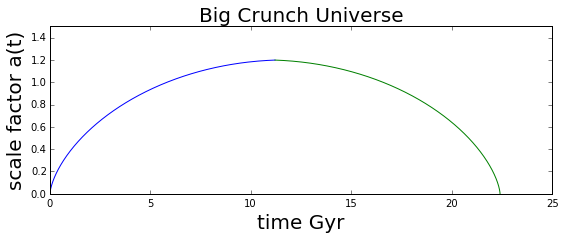

In [113]:
def integrand2(x):
        try:
            return quad(univ_crunch.friedmann_eq,a2.max(),x,)
        except:
            return np.nan,np.nan
step = 0.01
values3 = [] 
a3 = np.linspace(a2.max(),0,1000)
#print(a3)
for i in a3:
    integral2,err = integrand2(i)
    values3.append(integral2)
#print(integral2)    
values3 = np.asarray(values3)
values3 = values3/(1e9*365*24*3600)
#print(values3)    
    
figure(figsize=(9,3))
plot(values2,a2)
plot((values2.max()-values3),a3)
xlabel('time Gyr',fontsize = 20)
ylabel('scale factor a(t)', fontsize= 20)
ylim(0,1.5)

title("Big Crunch Universe", fontsize = 20)


# Problem 2

We are given that the density profile of an isothermal sphere is :
ρ(r) = σ{v}^2/(2πGr^2)

we also know that within an enclosed sphere of radius R, the mass M(R) can be expressed with the following relation:
M(R) = ∫{upper R} ρ(r) * dr
we can expand the expression out and get 
∫{R,0}∫{π,0}∫{2π,0} ρ(r) * r^2dφdcosθdr
plugging in ρ(r) = σ{v}^2/(2πGr^2) we can simplify with
∫{2π,0} dφ = 2π
∫{π,0} dcosθ = 1 
∫{R,0} dr = R
the r^2 simply cancel out and arrive at 
M(R) =  (2 * σ{v}^2*R)/(G)

Then using the hint of the Einstein radius 
θ{E}^2 = (4 * G * D{ls})/(c^2 * D{l} * D{s})/(4 * G * D{ls})
rearranging for mass we get
M = (θ^2 * c^2 * D{l} * D{s})/(4 * G * D{ls})

Thus, we have two expressions for mass M 
(2 * σ{v}^2*R)/(G) = (θ^2 * c^2 * D{l} * D{s})/(4 * G * D{ls})

we know all of the varibles besides the velocity distribution σ{v}
then solving for said variable we get 

σ{v}^2 = (G * θ^2 * c^2 * D{l} * D{s})/(8 * G * D{ls} * R)

The G's easily cancel. Then, using the small angle approximation
R/D{s} = θ

thus, simplified, we get 
σ{v}^2 = (θ^2 * c^2 * D{l} * D{s})/(8 * D{ls})

and finnaly we can convert θ from radians to arcseconds and arrive at the desired relation

σ{v} = 10^3[km * s^-1] * ((θ/28")(D{s}/D{ls}))^1/2
